In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

print('Imported')

Imported


In [2]:
data = pd.read_csv('./labeled_data.csv')
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
data.tail()

,index,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [4]:
data.shape

(24783, 7)

In [5]:
data.describe()

,index,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [6]:
data.columns

Index(['index', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [7]:
data.info

<bound method DataFrame.info of        index  count  hate_speech  offensive_language  neither  class  \
0          0      3            0                   0        3      2   
1          1      3            0                   3        0      1   
2          2      3            0                   3        0      1   
3          3      3            0                   2        1      1   
4          4      6            0                   6        0      1   
...      ...    ...          ...                 ...      ...    ...   
24778  25291      3            0                   2        1      1   
24779  25292      3            0                   1        2      2   
24780  25294      3            0                   3        0      1   
24781  25295      6            0                   6        0      1   
24782  25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @mayasolovely: As a woman you 

In [8]:
data.nunique()

index                 24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64

In [9]:
data.isnull().sum()

index                 0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data["labels"] = data["class"].map({
    0:"Hate Speech",
    1:"Offensive Language",
    2:"No Hate and Offensive"
})

In [12]:
print(data["labels"])

0        No Hate and Offensive
1           Offensive Language
2           Offensive Language
3           Offensive Language
4           Offensive Language
                 ...          
24778       Offensive Language
24779    No Hate and Offensive
24780       Offensive Language
24781       Offensive Language
24782    No Hate and Offensive
Name: labels, Length: 24783, dtype: object


In [13]:
data

,index,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


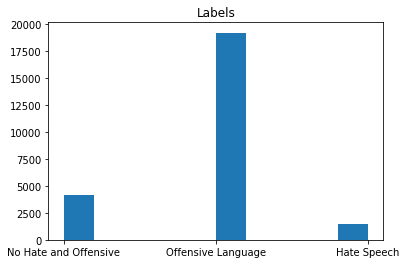

In [14]:
plt.hist(data['labels'],bins=10)
plt.title('Labels')
plt.show()

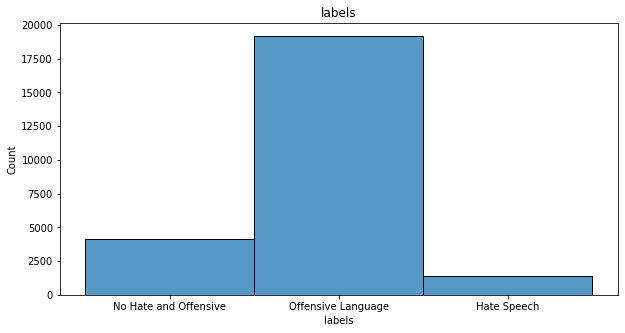

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data['labels'],bins=10)
plt.title('labels')
plt.show()

In [16]:
data["hate_speech"].unique()

array([0, 1, 2, 3, 4, 6, 5, 7], dtype=int64)

In [17]:
data['hate_speech'].value_counts()

0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech, dtype: int64

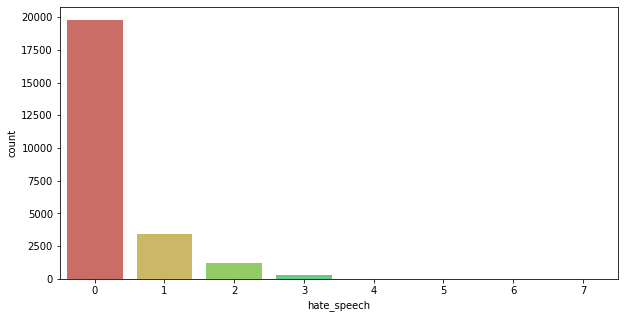

In [18]:
plt.figure(figsize=(10,5))
sns.countplot('hate_speech',data=data,palette='hls')
plt.show()

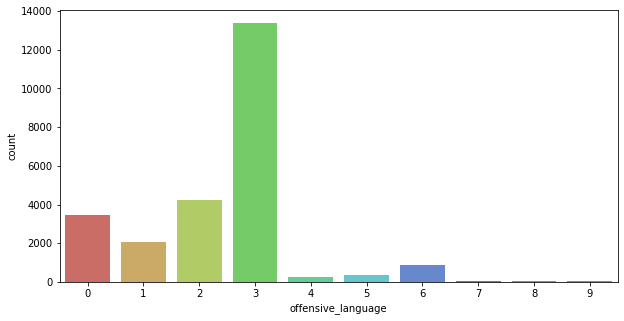

In [19]:
plt.figure(figsize=(10,5))
sns.countplot('offensive_language',data=data,palette='hls')
plt.show()

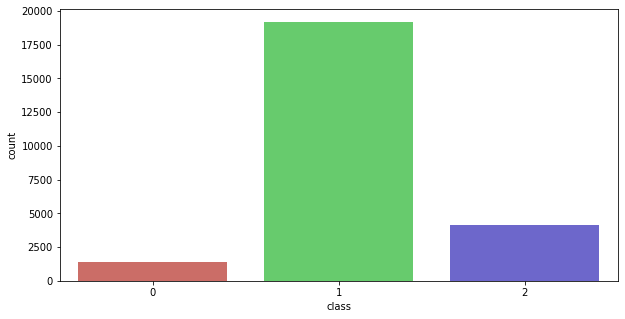

In [20]:
plt.figure(figsize=(10,5))
sns.countplot('class',data=data,palette='hls')
plt.show()

In [21]:
# for i in data.columns:
#     plt.figure(figsize=(10,5))
#     sns.countplot(data[i],data=data,palette='husl')
#     plt.show()

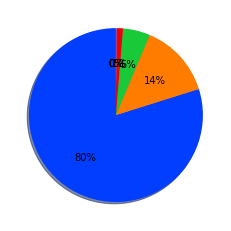

In [22]:
colors = sns.color_palette('bright')
# explode = [0.4,0.3,0.2,0.1]
plt.pie(data['hate_speech'].value_counts(), colors = colors, autopct = '%0.0f%%', shadow = 'True', startangle = 90,)
plt.show()

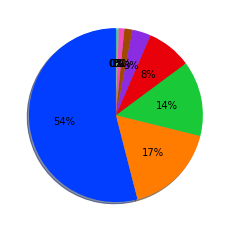

In [23]:
colors = sns.color_palette('bright')
# explode = [0.3,0.2,0.1]
# plt.figure(figsize=(20,15))
plt.pie(data['offensive_language'].value_counts(), colors = colors, 
        autopct = '%0.0f%%', shadow = 'True', startangle = 90)
plt.show()

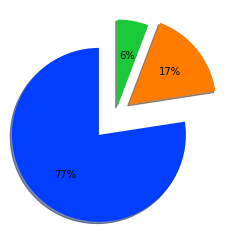

In [24]:
colors = sns.color_palette('bright')
explode = [0.3,0.2,0.1]
# plt.figure(figsize=(20,15))
plt.pie(data['labels'].value_counts(), colors = colors, 
        autopct = '%0.0f%%', shadow = 'True', startangle = 90,explode=explode)
plt.show()

In [25]:
# colors = sns.color_palette('bright')
# for i in data.columns:
#     plt.pie(data[i].value_counts(), colors = colors, 
#         autopct = '%0.0f%%', shadow = 'True', startangle = 90,)
#     plt.show()

In [26]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print('total_length_characters:',total_length_characters)
count = 0
for y in data['tweet']:
    count = count+1
print("count:",count)
average_length = total_length_characters/count
print("average length:",average_length)

0        140
1         85
2        120
3         62
4        137
        ... 
24778    146
24779     70
24780     67
24781     37
24782    127
Name: total_length_characters, Length: 24783, dtype: int64
total_length_characters: 2117334
count: 24783
average length: 85.43493523786466


In [27]:
data['total_count_words'] = data['tweet'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print('total_words:',total_words)
count = 0
for y in data['tweet']:
    count = count+1
print("count:",count)
average_word = total_words/count
print("average length:",average_word)

0        25
1        16
2        21
3         9
4        26
         ..
24778    19
24779    13
24780    13
24781     7
24782    18
Name: total_count_words, Length: 24783, dtype: int64
total_words: 349857
count: 24783
average length: 14.116813945042972


In [28]:
import string
import re
import nltk
import pandas as pd
import numpy as np
from nltk.util import pr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))
import warnings
warnings.filterwarnings('ignore')

print('Completed')

Completed


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
data.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,labels,total_length_characters,total_count_words
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive,140,25
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language,85,16
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language,120,21
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language,62,9
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language,137,26


In [30]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\}]','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['tweet']=data['tweet'].apply(clean)
print(data['tweet'])

0         rt mayasolov woman shouldnt complain clean ho...
1         rt  boy dat coldtyga dwn bad cuffin dat hoe  ...
2         rt urkindofbrand dawg rt  ever fuck bitch sta...
3                   rt cganderson vivabas look like tranni
4         rt shenikarobert shit hear might true might f...
                               ...                        
24778    yous muthafin lie   coreyemanuel right tl tras...
24779    youv gone broke wrong heart babi drove redneck...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl  ntac eileen dahlia  beauti color combin...
Name: tweet, Length: 24783, dtype: object


In [31]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print('total_length_characters:',total_length_characters)
count = 0
for y in data['tweet']:
    count = count+1
print("count:",count)
average_length = total_length_characters/count
print("average length:",average_length)

0        73
1        51
2        64
3        39
4        65
         ..
24778    68
24779    52
24780    52
24781    30
24782    80
Name: total_length_characters, Length: 24783, dtype: int64
total_length_characters: 1212303
count: 24783
average length: 48.91671710446677


In [32]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [33]:
x.shape

(24783,)

In [34]:
y.shape

(24783,)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer #frequency of a word in whole document
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
vectorizer.get_feature_names_out()
print(X.shape)
print(y.shape)

(24783, 25693)
(24783,)


In [34]:
first_vector = X[0]
dataframe = pd.DataFrame(first_vector.T.todense(),index = vectorizer.get_feature_names(),columns=["tfidf"])
dataframe.sort_values(by = ["tfidf"],ascending=False)

,tfidf
mayasolov,0.477508
shouldnt,0.351964
complain,0.333887
clean,0.329161
woman,0.297411
...,...
goe,0.000000
godzilla,0.000000
godthat,0.000000
godsmackmus,0.000000


In [35]:
from sklearn.cluster import KMeans

In [36]:
# this cell creates a cluster for all the words in the document
wcss = [] #sum of squared distance of a point from the centroid of a cluster is wcss, in here we store all the points distance to centroid in a list
for i in range(1,11):
    km =KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

In [37]:
print(km.cluster_centers_)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.07827480e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.84477498e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [38]:
wcss

[24511.487522484655,
 24371.370197969572,
 24265.478409171654,
 24177.278799022788,
 24134.509958164796,
 24056.97841845575,
 24009.095897939274,
 23950.557906451904,
 23916.447246013842,
 23872.58872427991]

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred = clf.predict(X_test)

In [42]:
print("Training Accuracy:",clf.score(X_train,y_train))
print("Testing Accuracy:",clf.score(X_test,y_test))

Training Accuracy: 0.9996386412912551
Testing Accuracy: 0.8707665973835432


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
matrix = confusion_matrix(y_test,y_pred)
print("confusion_matrix:\n",matrix)

confusion_matrix:
 [[ 103   48  314]
 [  33 1121  225]
 [ 201  236 5898]]


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred = model.predict(X_test)

In [49]:
text = "Hello, I'm Akash !!! Your machine learning algo is working"
data = vectorizer.transform([text]).toarray()
print(clf.predict(data))

['No Hate and Offensive']


In [64]:
text = "noiceeee!!!"
data = vectorizer.transform([text]).toarray()
print(clf.predict(data))

['No Hate and Offensive']
